<a href="https://colab.research.google.com/github/angurakanisa31/Car-Price-Prediction-Data-Science/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install selenium

In [ ]:
%pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.7/512.7 kB 32.6 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
import os # Import the os module

# from google.colab import files # Keep this line if running in Google Colab

# Configure Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Initialize browser with configured options
# NOTE: Ensure you have the Chrome driver configured for your environment
driver = webdriver.Chrome(options=chrome_options)

# List of car brands & models to scrape (EXPANDED LIST for more data points)
# Focusing on popular brands/models likely to have listings on Cars.com
car_brands = {
    "toyota": ["camry", "corolla", "sienna", "highlander"],
    "honda": ["accord", "civic", "crv", "pilot"],
    "ford": ["f150", "escape", "explorer", "mustang"],
    "chevrolet": ["silverado_1500", "equinox", "malibu"],
    "nissan": ["rogue", "altima", "sentra"],
    "hyundai": ["elantra", "sonata"],
    "kia": ["forte", "telluride"],
    "subaru": ["outback", "forester"]
}

car_data = []

# Define a more reasonable page limit to hit the target faster/more reliably
# If each page has ~20 listings, 5 pages per model * 25 models = 2500 listings (max)
MAX_PAGES_PER_MODEL = 15 # Reduced from 150. Aim for around 10-20 pages per search.

# Loop through each brand and model
for brand, models in car_brands.items():
    for model in models:
        # Construct the URL for the specific brand and model
        url = f"https://www.cars.com/shopping/results/?makes[]={brand}&models[]={model}&list_price_max=&maximum_distance=all&stock_type=used&zip=10001"
        print(f"Scraping: {brand.upper()} {model.replace('_', ' ').upper()}...")
        driver.get(url)
        time.sleep(5) # Initial wait for the first page to load

        # Scrape up to the defined max pages for the current model
        for page in range(1, MAX_PAGES_PER_MODEL + 1):
            print(f"  -> Page {page}...")
            # Break if we've reached a sufficient amount of data (optional optimization)
            if len(car_data) >= 1000 and page > 5:
                print("  -> Dataset size goal reached, moving to next model.")
                break

            listings = driver.find_elements(By.CLASS_NAME, "vehicle-card")

            if not listings:
                print("  -> No more listings found on this page.")
                break # Break if no listings are found (end of results)

            for listing in listings:
                try:
                    # Extract data points
                    name = listing.find_element(By.CLASS_NAME, "title").text
                    price = listing.find_element(By.CLASS_NAME, "primary-price").text
                    mileage = listing.find_element(By.CLASS_NAME, "mileage").text
                    location = listing.find_element(By.CLASS_NAME, "dealer-name").text

                    car_data.append({
                        "Brand": brand,
                        "Model": model,
                        "Car": name,
                        "Price": price,
                        "Mileage": mileage,
                        "Location": location
                    })
                except Exception as e:
                    # print(f"  -> Error scraping listing: {e}") # Uncomment for debugging
                    continue

            # Go to next page
            try:
                # Find and click the 'Next page' button
                next_button = driver.find_element(By.XPATH, '//a[@aria-label="Next page"]')
                next_button.click()
                time.sleep(3) # Shorter wait time for page navigation
            except:
                # If the 'Next page' button isn't found, we're likely on the last page
                print("  -> No 'Next page' button found. End of results for this model.")
                break # Exit the page loop

# Close browser
driver.quit()

# Save data
df = pd.DataFrame(car_data)
file_path = "cars_dataset_multi.csv"
df.to_csv(file_path, index=False)
print("-" * 50)
print(f"✅ Data saved to {file_path} with {len(df)} entries.")
print(f"Current working directory: {os.getcwd()}") # Print current working directory

# Download the dataset (Colab-specific)
# try:
#     files.download(file_path)
# except NameError:
#     print("Note: The files.download() function is intended for Google Colab environments.")

Scraping: TOYOTA CAMRY...
  -> Page 1...
  -> No 'Next page' button found. End of results for this model.
Scraping: TOYOTA COROLLA...
  -> Page 1...
  -> No 'Next page' button found. End of results for this model.
Scraping: TOYOTA SIENNA...
  -> Page 1...
  -> No 'Next page' button found. End of results for this model.
Scraping: TOYOTA HIGHLANDER...
  -> Page 1...
  -> No 'Next page' button found. End of results for this model.
Scraping: HONDA ACCORD...
  -> Page 1...
  -> No 'Next page' button found. End of results for this model.
Scraping: HONDA CIVIC...
  -> Page 1...
  -> No 'Next page' button found. End of results for this model.
Scraping: HONDA CRV...
  -> Page 1...
  -> No 'Next page' button found. End of results for this model.
Scraping: HONDA PILOT...
  -> Page 1...
  -> No 'Next page' button found. End of results for this model.
Scraping: FORD F150...
  -> Page 1...
  -> No 'Next page' button found. End of results for this model.
Scraping: FORD ESCAPE...
  -> Page 1...
  -> N

In [ ]:
# Calculate the average price per brand
average_price_by_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

print("\nAverage Price by Car Brand:")
display(average_price_by_brand)


Average Price by Car Brand:


,Price
Brand,
chevrolet,39100.363636
ford,36511.238636
kia,29954.659091
hyundai,26686.000000
toyota,26616.329545
nissan,22413.469697
subaru,21725.090909
honda,20325.818182


In [ ]:
# Clean the 'Price' column: remove '$' and ',' and convert to numeric
df['Price'] = df['Price'].replace({'$': '', ',': ''}, regex=True).astype(float)

# Clean the 'Mileage' column: remove ' mi.' and ',' and convert to numeric
df['Mileage'] = df['Mileage'].replace({' mi.': '', ',': ''}, regex=True).astype(float)

print("DataFrame after cleaning 'Price' and 'Mileage' columns:")
display(df.head())
df.info()

DataFrame after cleaning 'Price' and 'Mileage' columns:


,Brand,Model,Car,Price,Mileage,Location
0,toyota,camry,2023 Toyota Venza LE,32197.0,11181.0,Hillside Toyota
1,toyota,camry,2022 Toyota Camry XSE,32047.0,21446.0,Hillside Toyota
2,toyota,camry,2023 Toyota Camry SE,27915.0,23572.0,Mitchell Hyundai
3,toyota,camry,2024 Toyota Camry LE,24900.0,7979.0,Fort Mill Hyundai
4,toyota,camry,2021 Toyota Tacoma SR5,37494.0,11426.0,Roseville Hyundai


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     528 non-null    object 
 1   Model     528 non-null    object 
 2   Car       528 non-null    object 
 3   Price     528 non-null    float64
 4   Mileage   528 non-null    float64
 5   Location  528 non-null    object 
dtypes: float64(2), object(4)
memory usage: 24.9+ KB


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("cars_dataset_multi.csv")

# Display the first few rows
print("Initial Dataset Head:")
display(df.head())

# Display column names, non-null counts, and data types
print("\nDataset Info:")
df.info()

Initial Dataset Head:


,Brand,Model,Car,Price,Mileage,Location
0,toyota,camry,2023 Toyota Venza LE,"$32,197","11,181 mi.",Hillside Toyota
1,toyota,camry,2022 Toyota Camry XSE,"$32,047","21,446 mi.",Hillside Toyota
2,toyota,camry,2023 Toyota Camry SE,"$27,915","23,572 mi.",Mitchell Hyundai
3,toyota,camry,2024 Toyota Camry LE,"$24,900","7,979 mi.",Fort Mill Hyundai
4,toyota,camry,2021 Toyota Tacoma SR5,"$37,494","11,426 mi.",Roseville Hyundai



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     528 non-null    object
 1   Model     528 non-null    object
 2   Car       528 non-null    object
 3   Price     528 non-null    object
 4   Mileage   528 non-null    object
 5   Location  528 non-null    object
dtypes: object(6)
memory usage: 24.9+ KB


In [ ]:
from google.colab import files

files.download('cars_dataset_multi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

try:
    files.download('cars_dataset_multi.csv')
except FileNotFoundError:
    print("FileNotFoundError: The file 'cars_dataset_multi.csv' was not found in the current working directory.")
    print("Please ensure the previous cell successfully created the file and verify the current working directory.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Load the Dataset and Initial Inspection
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("cars_dataset_multi.csv")

# Display the first few rows
print("Initial Dataset Head:")
print(df.head())

# Display column names, non-null counts, and data types
print("\nDataset Info:")
print(df.info())

Initial Dataset Head:
    Brand  Model                     Car    Price     Mileage  \
0  toyota  camry    2023 Toyota Venza LE  $32,197  11,181 mi.   
1  toyota  camry   2022 Toyota Camry XSE  $32,047  21,446 mi.   
2  toyota  camry    2023 Toyota Camry SE  $27,915  23,572 mi.   
3  toyota  camry    2024 Toyota Camry LE  $24,900   7,979 mi.   
4  toyota  camry  2021 Toyota Tacoma SR5  $37,494  11,426 mi.   

            Location  
0    Hillside Toyota  
1    Hillside Toyota  
2   Mitchell Hyundai  
3  Fort Mill Hyundai  
4  Roseville Hyundai  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     528 non-null    object
 1   Model     528 non-null    object
 2   Car       528 non-null    object
 3   Price     528 non-null    object
 4   Mileage   528 non-null    object
 5   Location  528 non-null    object
dtypes: object(6)
memory u

In [ ]:
#Handle Duplicates
# Check for duplicate rows
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_removed = initial_rows - len(df)
print(f"\nRemoved {rows_removed} duplicate rows.")


Removed 0 duplicate rows.


In [ ]:
#Clean and Convert the 'Price' Column
# Remove '$' and ',' from the Price column and convert to integer
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Remove any rows where price conversion failed (e.g., listings with "Call for Price")
# We use .replace(r'[^\d.]+', np.nan, regex=True) to replace non-numeric characters with NaN
df['Price'] = df['Price'].replace(r'[^\d.]+', np.nan, regex=True)

# Convert to float and then to integer (since prices are typically whole numbers)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').astype('Int64')

print("\n'Price' column cleaned and converted to numeric.")


'Price' column cleaned and converted to numeric.


In [ ]:
#Clean and Convert the 'Mileage' Column
# Remove 'mi.', ',', and 'miles' from the Mileage column
df['Mileage'] = df['Mileage'].astype(str).str.replace('mi.', '', regex=False).str.replace(',', '', regex=False).str.replace('miles', '', regex=False).str.strip()

# Handle potential non-numeric values (e.g., "Not available") by coercing to NaN
# Convert to float and then to integer
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce').astype('Int64')

print("'Mileage' column cleaned and converted to numeric.")

'Mileage' column cleaned and converted to numeric.


In [ ]:
#Extract 'Year' and Clean 'Car' Column
# Extract the first 4 digits as the Year
df['Year'] = df['Car'].astype(str).str.extract(r'(\d{4})').astype('Int64')

# Clean the 'Car' column by removing the year, brand, and model name for a cleaner title
# This is complex, but a simple cleaning step is to just remove the extracted year:
df['Car_Title_Clean'] = df['Car'].astype(str).str.replace(r'^\d{4}\s*', '', regex=True).str.strip()

print("'Year' column extracted, and 'Car' column partially cleaned.")

'Year' column extracted, and 'Car' column partially cleaned.


In [ ]:
#Handle Missing Values (Imputation/Removal)
# Check the number of rows before handling missing values
rows_before_na = len(df)

# Drop rows where 'Price' or 'Mileage' is missing (NaN) as these are critical features
df.dropna(subset=['Price', 'Mileage', 'Year'], inplace=True)

rows_removed_na = rows_before_na - len(df)
print(f"\nRemoved {rows_removed_na} rows with missing critical values (Price, Mileage, or Year).")
print(f"Final dataset size: {len(df)} entries.")


Removed 0 rows with missing critical values (Price, Mileage, or Year).
Final dataset size: 528 entries.


In [ ]:
# Final Review and Save
# Final review of the data types and descriptive statistics
print("\nFinal Data Info:")
print(df.info())

print("\nDescriptive Statistics for Numeric Data:")
print(df[['Price', 'Mileage', 'Year']].describe())

# Save the final cleaned dataset
df.to_csv("cars_dataset_cleaned.csv", index=False)
print("\n✅ Cleaned data saved to cars_dataset_cleaned.csv.")


Final Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            528 non-null    object
 1   Model            528 non-null    object
 2   Car              528 non-null    object
 3   Price            528 non-null    Int64 
 4   Mileage          528 non-null    Int64 
 5   Location         528 non-null    object
 6   Year             528 non-null    Int64 
 7   Car_Title_Clean  528 non-null    object
dtypes: Int64(3), object(5)
memory usage: 34.7+ KB
None

Descriptive Statistics for Numeric Data:
              Price       Mileage         Year
count         528.0         528.0        528.0
mean   28128.606061  54592.386364  2021.214015
std    12373.472347  35071.066131     3.015084
min          3977.0         627.0       2006.0
25%        21334.75      30810.75       2020.0
50%         24995.0       49811.0       2022.0
7

In [ ]:
#EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Load the cleaned dataset
try:
    df = pd.read_csv("cars_dataset_cleaned.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'cars_dataset_cleaned.csv' not found. Please ensure the preprocessing step was completed.")
    exit()

# Ensure numeric columns are the correct type after loading
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

Dataset loaded successfully.


In [ ]:
#Initial Summary and Statistical Overview
print("\n--- Initial Data Summary ---")
print("Data Head:")
print(df.head())

print("\nData Info (Data Types and Non-Null Counts):")
df.info()

print("\nDescriptive Statistics (Numeric Columns):")
print(df[['Price', 'Mileage', 'Year']].describe())

print("\nValue Counts for Top 10 Brands:")
print(df['Brand'].value_counts().head(10))


--- Initial Data Summary ---
Data Head:
    Brand  Model                     Car  Price  Mileage           Location  \
0  toyota  camry    2023 Toyota Venza LE  32197    11181    Hillside Toyota   
1  toyota  camry   2022 Toyota Camry XSE  32047    21446    Hillside Toyota   
2  toyota  camry    2023 Toyota Camry SE  27915    23572   Mitchell Hyundai   
3  toyota  camry    2024 Toyota Camry LE  24900     7979  Fort Mill Hyundai   
4  toyota  camry  2021 Toyota Tacoma SR5  37494    11426  Roseville Hyundai   

   Year    Car_Title_Clean  
0  2023    Toyota Venza LE  
1  2022   Toyota Camry XSE  
2  2023    Toyota Camry SE  
3  2024    Toyota Camry LE  
4  2021  Toyota Tacoma SR5  

Data Info (Data Types and Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            528 non-null    object
 1   Model            528 

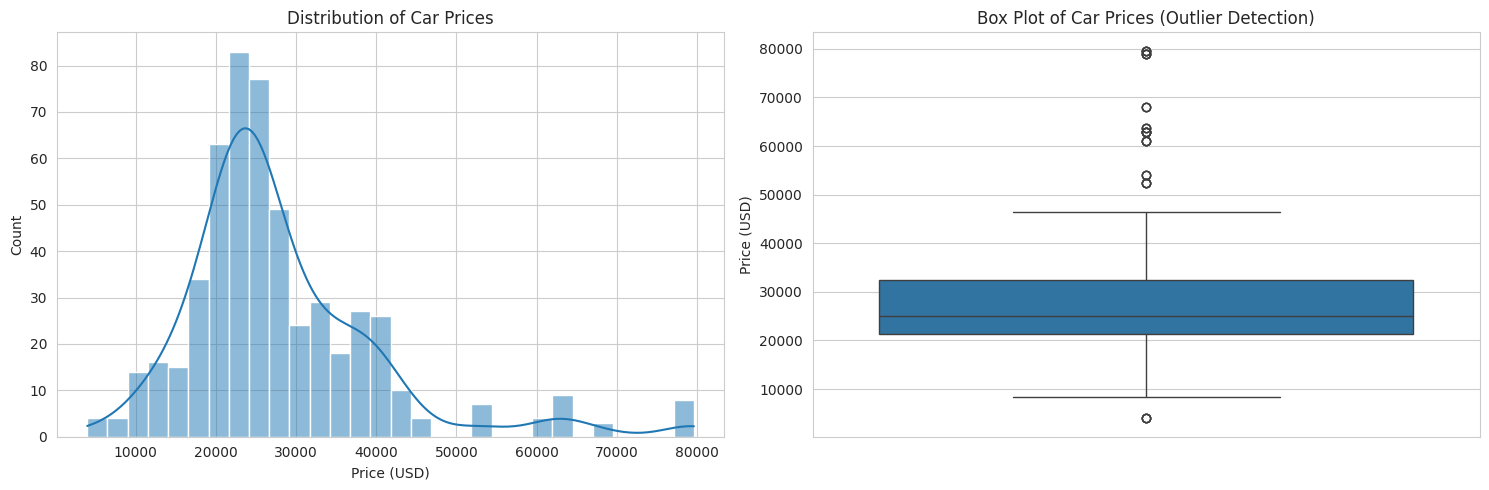

In [ ]:
#Univariate Analysis (Individual Columns)
# Price Distribution
plt.figure(figsize=(15, 5))

# Histogram for distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (USD)')

# Box Plot for Outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title('Box Plot of Car Prices (Outlier Detection)')
plt.ylabel('Price (USD)')

plt.tight_layout()
plt.show()

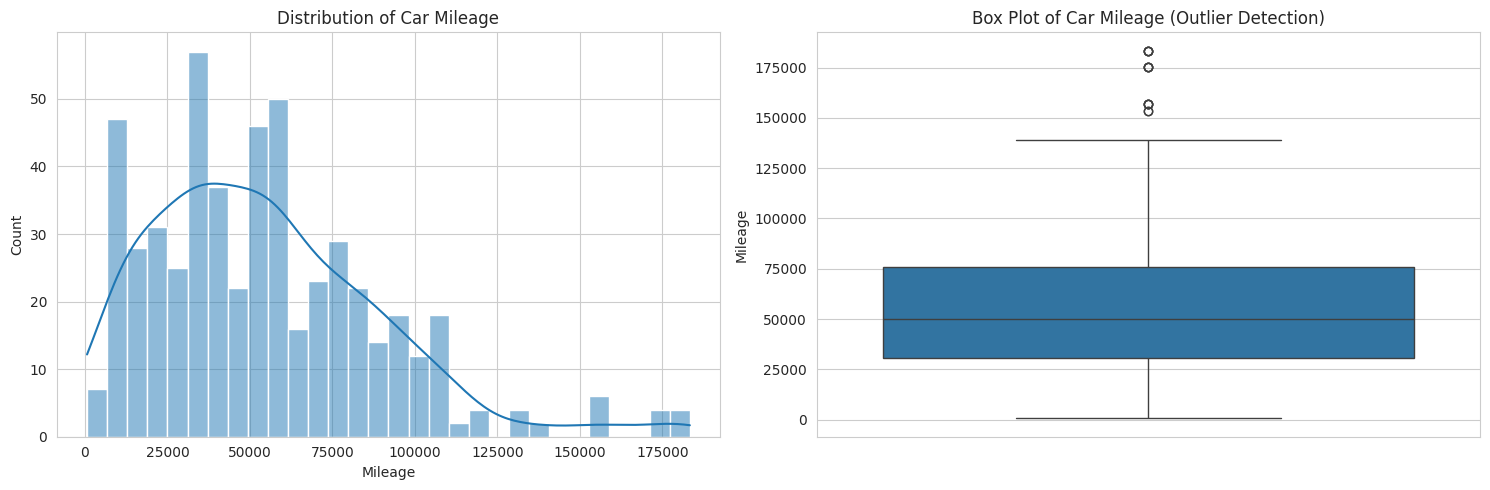

In [ ]:
#: Mileage Distribution
plt.figure(figsize=(15, 5))

# Histogram for distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Mileage'], bins=30, kde=True)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage')

# Box Plot for Outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Mileage'])
plt.title('Box Plot of Car Mileage (Outlier Detection)')
plt.ylabel('Mileage')

plt.tight_layout()
plt.show()

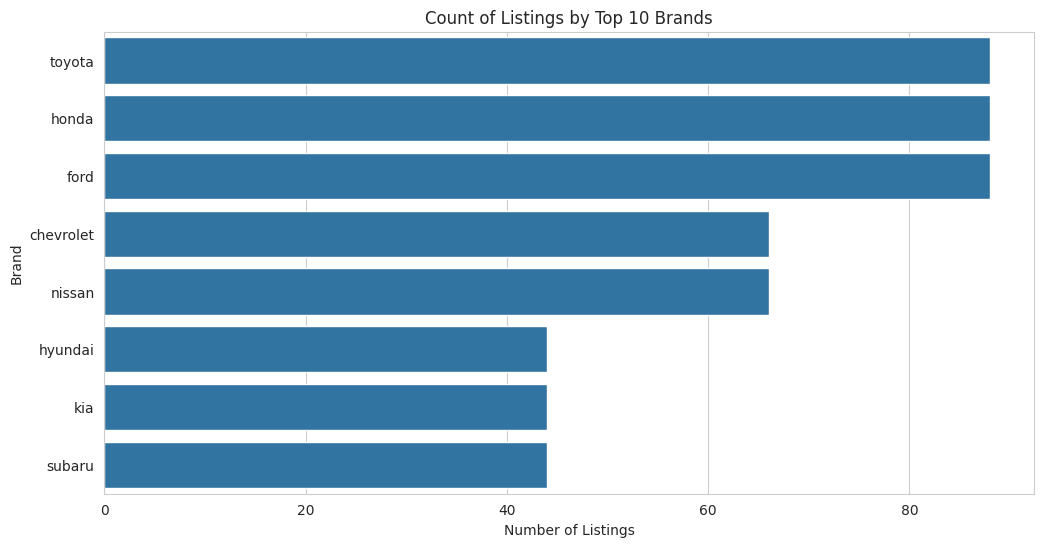

In [ ]:
#Brand Distribution (Top 10)
plt.figure(figsize=(12, 6))
# Get the top 10 brands for a clearer visualization
top_brands = df['Brand'].value_counts().nlargest(10).index
sns.countplot(y='Brand', data=df, order=top_brands)
plt.title('Count of Listings by Top 10 Brands')
plt.xlabel('Number of Listings')
plt.ylabel('Brand')
plt.show()

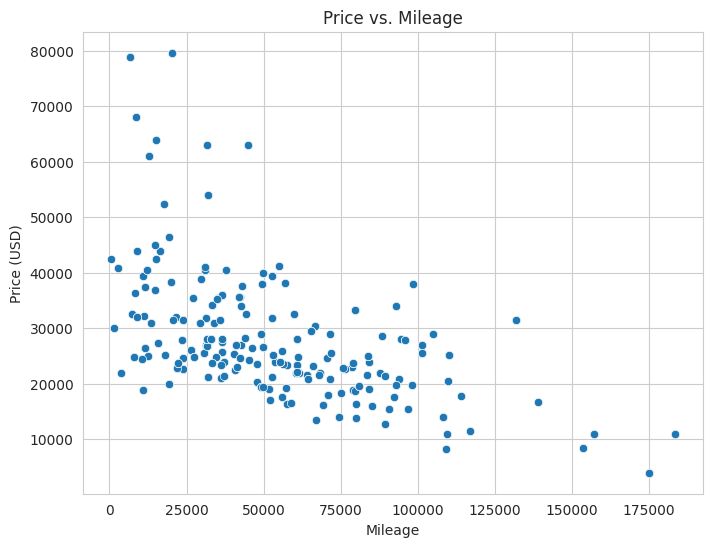

Observation: A clear inverse relationship is expected (negative correlation).


In [ ]:
# Bivariate Analysis (Relationships
# Price vs. Mileage (Numerical-Numerical)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price (USD)')
plt.show()
print("Observation: A clear inverse relationship is expected (negative correlation).")

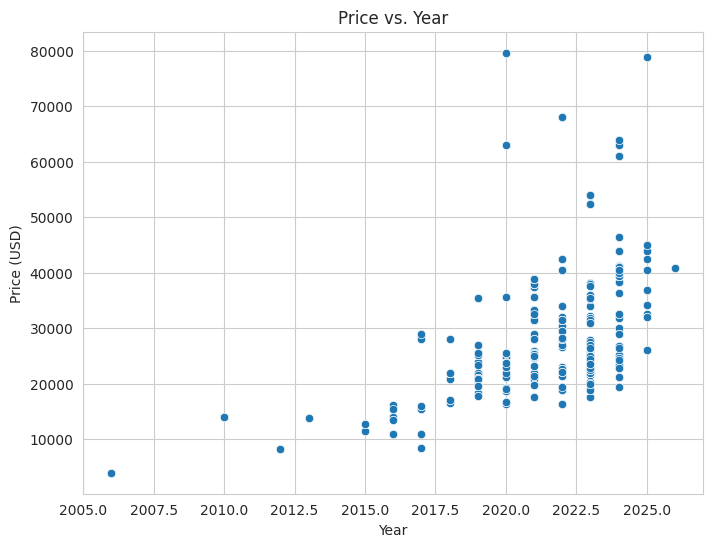

Observation: A positive correlation is expected (newer cars cost more).


In [ ]:
#Price vs. Year (Numerical-Numerical)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.show()
print("Observation: A positive correlation is expected (newer cars cost more).")

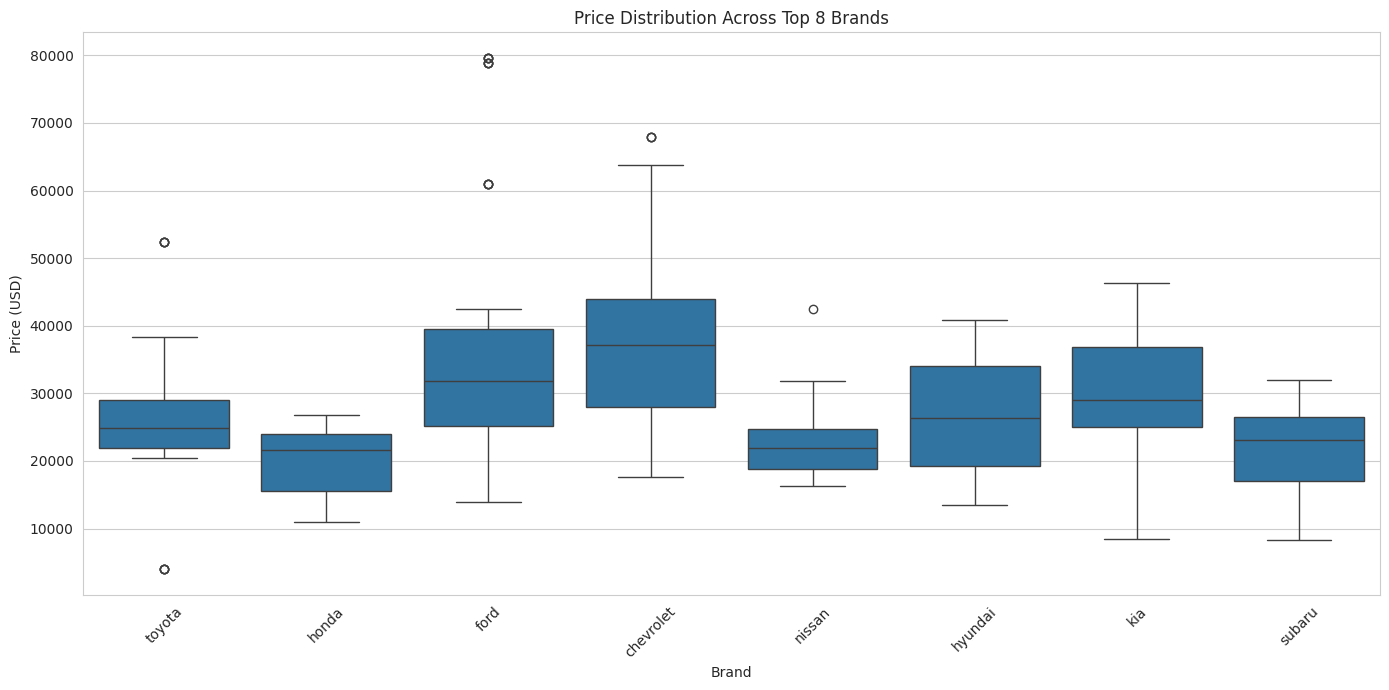

Observation: Compare median prices and price variability (whisker length) across brands.


In [ ]:
#Price Distribution by Brand (Categorical-Numerical)
plt.figure(figsize=(14, 7))
# Visualize price distribution for the top 8 most frequent brands
top_8_brands = df['Brand'].value_counts().nlargest(8).index
sns.boxplot(x='Brand', y='Price', data=df[df['Brand'].isin(top_8_brands)])
plt.title('Price Distribution Across Top 8 Brands')
plt.xlabel('Brand')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Observation: Compare median prices and price variability (whisker length) across brands.")

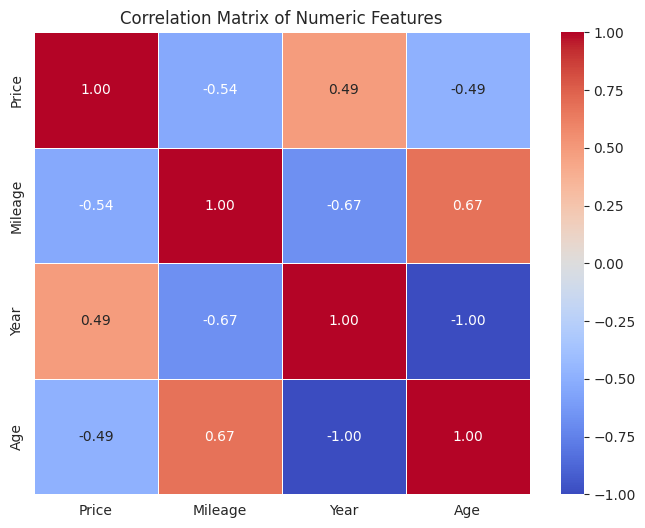


Observation: Note the strong correlations, especially the relationship between Price and Age/Year.


In [ ]:
#Multivariate Analysis (Correlation Heatmap)
# Create a new feature: Age of Car (Feature Engineering Review)
current_year = 2025 # Assuming the current year for a realistic 'Age' calculation
df['Age'] = current_year - df['Year']

# Select numeric columns for correlation
numeric_df = df[['Price', 'Mileage', 'Year', 'Age']]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()
print("\nObservation: Note the strong correlations, especially the relationship between Price and Age/Year.")

In [ ]:
# Feature Engineering & Final Check

print("\n--- Post-EDA Feature Check ---")
print("New 'Age' feature created.")
print(df[['Year', 'Age']].head())

print(f"\nFinal Cleaned Dataset size: {len(df)} entries.")
# Save the final dataset with the new 'Age' feature
df.to_csv("cars_dataset_final_for_model.csv", index=False)
print("✅ Final dataset (with 'Age' feature) saved to cars_dataset_final_for_model.csv.")


--- Post-EDA Feature Check ---
New 'Age' feature created.
   Year  Age
0  2023    2
1  2022    3
2  2023    2
3  2024    1
4  2021    4

Final Cleaned Dataset size: 528 entries.
✅ Final dataset (with 'Age' feature) saved to cars_dataset_final_for_model.csv.
